<a href="https://colab.research.google.com/github/anasabbad/Play-Store-App-Review-Analysis--EDA-Capstone/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

**Importing Libraries and Loading the data set**

In [ ]:
#importing the required libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the datasets
data= pd.read_csv('/content/drive/MyDrive/EDA_Capstone/Play Store Data.csv')

In [ ]:
reviews= pd.read_csv('/content/drive/MyDrive/EDA_Capstone/User Reviews.csv')

**Data Set Inspection**

Here we will see a glimpse of the data set 

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
reviews.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
data.shape

(10841, 13)

## **Handling missing values**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


From this we can see that there is some columns with missing values. We will either drop some columns or impute values depending on the data

In [ ]:
data['Reviews'] = data['Reviews'].fillna(0)

In [ ]:
data.shape

(10841, 13)

In [ ]:
data.info()
#data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


The missing values in content rating, current version and Android version can be imputed with the mode of the column as they are objects

In [ ]:
data['Rating'] = data['Rating'].fillna(data['Rating'].median())

In [ ]:
data['Type'] = data['Type'].fillna(data['Type'].mode()[0])

In [ ]:
data['Content Rating'] = data['Content Rating'].fillna(data['Content Rating'].mode()[0])

In [ ]:
data['Current Ver'] = data['Current Ver'].fillna(data['Current Ver'].mode()[0])

In [ ]:
data['Android Ver'] = data['Android Ver'].fillna(data['Android Ver'].mode()[0])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


now we can see that we have got rid of all the null values present in the data set.

**Checking for duplicates**

In [ ]:
duplicate_check= data['App'].duplicated().any()
duplicate_check

True

In [ ]:
data['App'].value_counts()


ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

now let us see whether the data is same in all those rows or not

In [ ]:
data[data['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


this may have happened because the data might have been pulled at different times. we need to keep the row with maximum value of reviews assuming that is the latest one.

For this we need to convert the reviews from object to numerical values

In [ ]:
data['Reviews'] = pd.to_numeric(data['Reviews'],errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [ ]:
data = data.sort_values('Reviews', kind= 'mergesort', ascending=False).drop_duplicates('App', keep='first').sort_index()

In [ ]:
duplicate_check= data['App'].duplicated().any()
duplicate_check

False

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9660 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9660 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9660 non-null   object 
 12  Android Ver     9660 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


Now we have removed all the duplicates 

In [ ]:
data['Reviews'] = data['Reviews'].fillna(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   float64
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9660 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9660 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9660 non-null   object 
 12  Android Ver     9660 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


**Data preparation**

we now need to convert the Size, Installs and Price columns to numerical values by removing the dollar sign and the plus symbols and change the column names with units

In [ ]:
data["Installs"] = data["Installs"].apply(lambda x: int(x.replace("+","").replace(",","")))
data.Installs.unique()

array([     10000,    5000000,     100000,      50000,    1000000,
         10000000,     500000,       5000,  100000000,   50000000,
             1000,  500000000,         50,        100,        500,
               10,          1,          5, 1000000000,          0])

In [ ]:

#
data = data[~data.isin(['Varies with device']).any(axis=1)]

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

data['Size'] = data['Size'].apply(value_to_float)
data['Size'] = pd.to_numeric(data['Size'], downcast='float')
data['Size'] = data['Size']/1000000
data.Size.unique()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

array([ 19. ,   8.7,   2.8,   5.6,  29. ,  33. ,   3.1,  28. ,  12. ,
        20. ,  21. ,  37. ,   5.5,  17. ,  39. ,  31. ,  14. ,   4.2,
        23. ,   6. ,  25. ,   6.1,   4.6,   9.2,   5.2,  11. ,   9.4,
        15. ,  10. ,   1.2,  24. ,  26. ,   8. ,   7.9,  56. ,  57. ,
        35. ,  54. ,   0. ,   3.6,   5.7,   8.6,   2.4,  27. ,   2.7,
         2.5,   7. ,  16. ,   3.4,   8.9,   3.9,   2.9,  38. ,  32. ,
         5.4,  18. ,   1.1,   2.2,   4.5,   9.8,  52. ,   9. ,   6.7,
        30. ,   2.6,   7.1,   3.7,  22. ,   7.4,   6.4,   3.2,   8.2,
         9.9,   4.9,   9.5,   5. ,   5.9,  13. ,  73. ,   6.8,   3.5,
         4. ,   2.3,   7.2,   2.1,  42. ,   7.3,   9.1,  55. ,   6.5,
         1.5,   7.5,  51. ,  41. ,  48. ,   8.5,  46. ,   8.3,   4.3,
         4.7,   3.3,  40. ,   7.8,   8.8,   6.6,   5.1,  61. ,  66. ,
         8.4,  44. ,   1.6,  53. ,   6.2,   1.4,   3. ,   5.8,   3.8,
         9.6,  45. ,  63. ,  49. ,  77. ,   4.4,   4.8,  70. ,   6.9,
         9.3,   8.1,

In [ ]:
#dropping the row at index position 9294 because it is incorrectly filled as 'Everyone'
data = data.drop([data.index[8004]])

In [ ]:
 data['Price'] = pd.to_numeric(data['Price'].str.replace('$',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8353 entries, 0 to 10838
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8353 non-null   object 
 1   Category        8353 non-null   object 
 2   Rating          8353 non-null   float64
 3   Reviews         8353 non-null   float64
 4   Size            8353 non-null   float64
 5   Installs        8353 non-null   object 
 6   Type            8353 non-null   object 
 7   Price           8353 non-null   float64
 8   Content Rating  8353 non-null   object 
 9   Genres          8353 non-null   object 
 10  Last Updated    8353 non-null   object 
 11  Current Ver     8353 non-null   object 
 12  Android Ver     8353 non-null   object 
dtypes: float64(4), object(9)
memory usage: 913.6+ KB


**Descriptive Statistics**

In [ ]:
data.describe()

,Rating,Reviews,Size,Price
count,8353.000000,8.353000e+03,8353.000000,8353.000000
mean,4.183192,1.198461e+05,20.342260,1.230875
std,0.513687,9.389876e+05,21.821355,18.112193
min,1.000000,0.000000e+00,0.000000,0.000000
25%,4.000000,1.700000e+01,4.500000,0.000000
50%,4.300000,4.600000e+02,12.000000,0.000000
75%,4.500000,1.508100e+04,28.000000,0.000000
max,5.000000,4.489389e+07,100.000000,400.000000


In [ ]:
data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,8353,8353,8353.000000,8.353000e+03,8353.000000,8353,8353,8353.000000,8353,8353,8353,8353,8353
unique,8353,33,NaN,NaN,NaN,20,2,NaN,6,115,1353,2698,32
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,NaN,NaN,NaN,"1,000,000",Free,NaN,Everyone,Tools,"August 3, 2018",1.0,4.1 and up
freq,1,1742,NaN,NaN,NaN,1162,7678,NaN,6862,728,174,795,2102
mean,NaN,NaN,4.183192,1.198461e+05,20.342260,NaN,NaN,1.230875,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.513687,9.389876e+05,21.821355,NaN,NaN,18.112193,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,1.700000e+01,4.500000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,4.600000e+02,12.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,1.508100e+04,28.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


<Figure size 504x504 with 0 Axes>

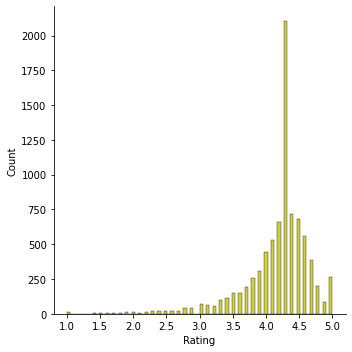

In [80]:
plt.figure(figsize=(7,7))
sns.displot(data['Rating'],color="y")

# **Exploring data**

In [ ]:
#Size of the biggest app
data['Size'].max()

100.0

In [ ]:
#findin the App that has largest size
data.loc[data['Size'].idxmax(),'App']

'Post Bank'

**Distibution of Genres present in PlayStore**

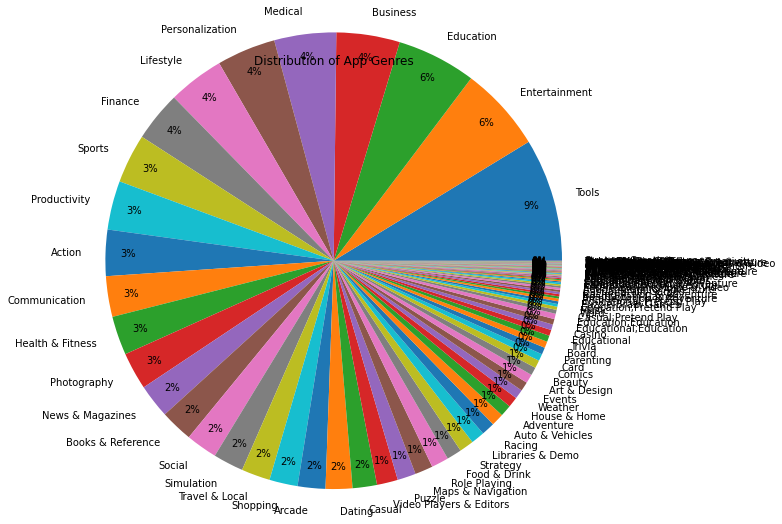

In [ ]:
data.Genres.value_counts().plot(kind='pie', autopct='%1.0f%%', pctdistance=0.9, radius=1.5,figsize=(7,7))
plt.ylabel('')
plt.xlabel('')
plt.title('Distribution of App Genres')
plt.show()

It can be seen that the Tools, Entertainment and Education Genres have the highest number of apps

**Percentage and No. of Free and Paid Apps present in PlayStore**

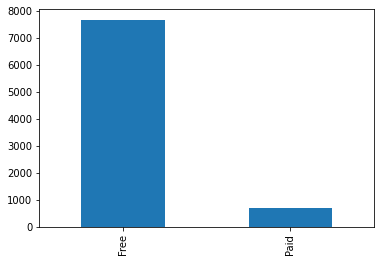

In [ ]:
data.Type.value_counts().plot(kind='bar')

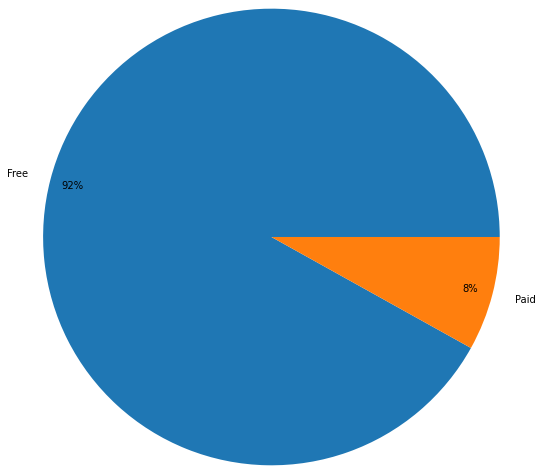

In [ ]:
data.Type.value_counts().plot(kind='pie', autopct='%1.0f%%', pctdistance=0.9, radius=1.5,figsize=(7,7))
plt.ylabel('')
plt.xlabel('')
plt.show()

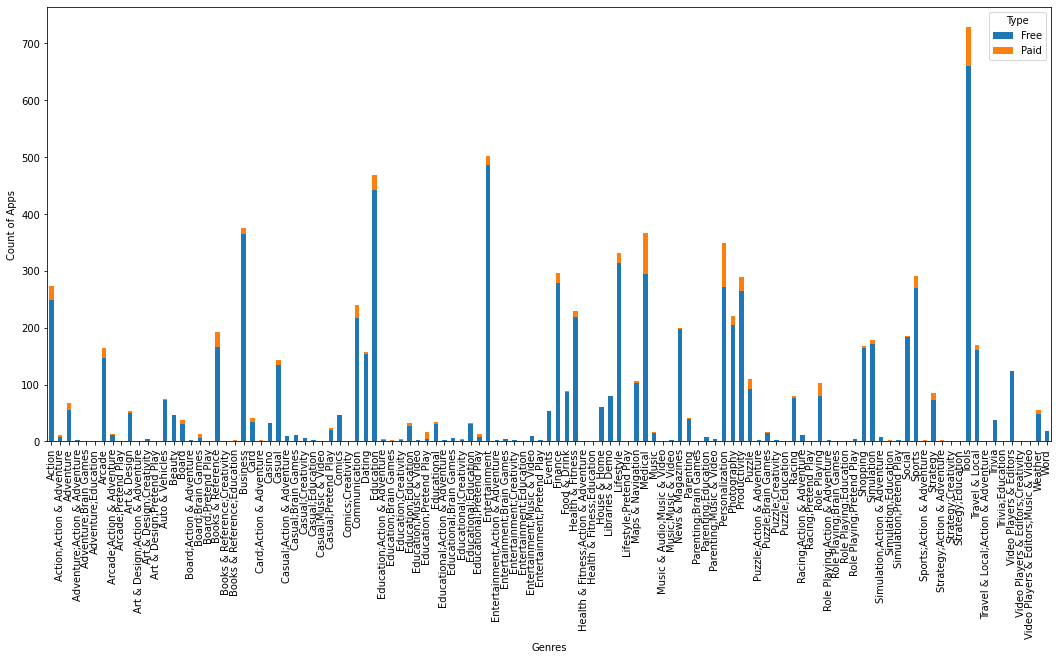

In [ ]:
data.groupby(['Genres','Type']).size().unstack().plot(kind='bar',stacked=True,figsize=(18,8))
plt.ylabel('Count of Apps')
plt.show()

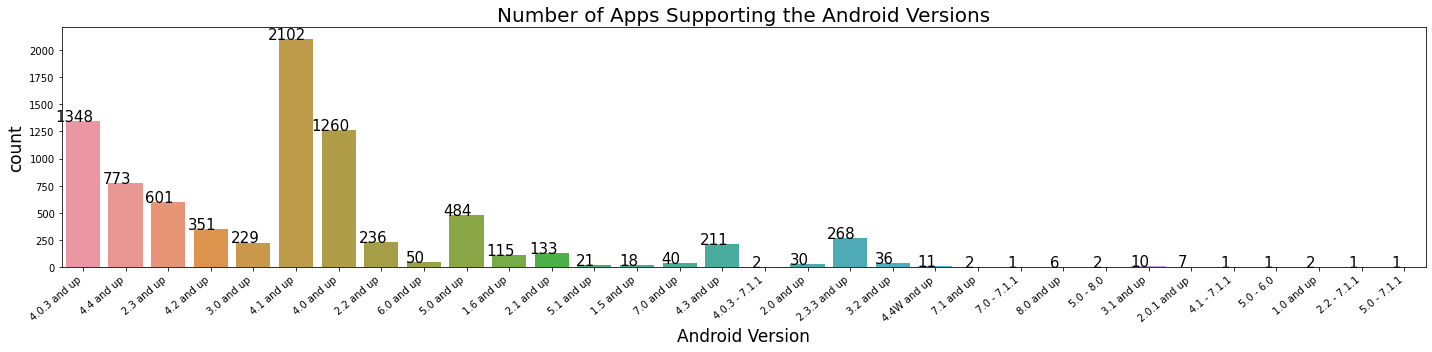

In [ ]:
plt.figure(figsize = (20,5))
ax=sns.countplot(x = "Android Ver", data = data)
ax.set_title("Number of Apps Supporting the Android Versions", fontsize = 20)
plt.xlabel("Android Version",fontsize=17)
plt.ylabel("count", fontsize=17)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Most of the Apps supports Android Versioin 4.0 and Up

**Average Ratings of different Genres**

                              Genres    Rating
34                 Comics;Creativity  4.800000
18                Board;Pretend Play  4.800000
62        Health & Fitness;Education  4.700000
53          Entertainment;Creativity  4.650000
84                  Puzzle;Education  4.600000
4              Adventure;Brain Games  4.600000
102      Strategy;Action & Adventure  4.600000
97           Simulation;Pretend Play  4.550000
71               Music;Music & Video  4.533333
89   Role Playing;Action & Adventure  4.533333
104               Strategy;Education  4.500000
8                Arcade;Pretend Play  4.500000
87               Racing;Pretend Play  4.500000
28                Casual;Brain Games  4.475000
11           Art & Design;Creativity  4.440000


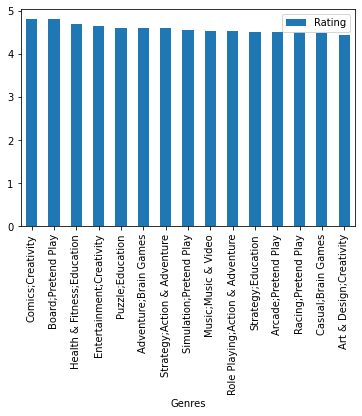

In [ ]:
avg_genre_rating=data.groupby('Genres')['Rating'].mean().reset_index().rename(columns={'Genres':'Genres','index':'Genres'})
#avg_genre_rating.sort_values('Rating', ascending=False).head(10)
avg_genre_rating = avg_genre_rating.sort_values(by=['Rating'], ascending=False)
top_rated_genres=avg_genre_rating.head(15)
print(top_rated_genres)
top_rated_genres.plot(x="Genres", y=["Rating"], kind="bar")


**Top 15 Genres based on the No of Apps**

In [ ]:
top_genres = data.Genres.value_counts().reset_index().rename(columns={'Genres':'No. of Apps','index':'Genres'})
top15_genres=top_genres.head(15)
top15_genres

,Genres,No. of Apps
0,Tools,728
1,Entertainment,502
2,Education,468
3,Business,375
4,Medical,366
5,Personalization,348
6,Lifestyle,331
7,Finance,296
8,Sports,291
9,Productivity,289


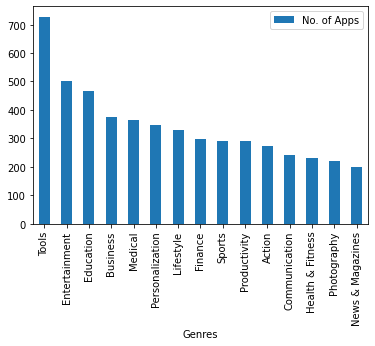

In [88]:
top15_genres.plot(x="Genres", y=["No. of Apps"], kind="bar")

**Top 15 Genres with most no. of Average downloads**

                             Genres      Installs
3      Adventure;Action & Adventure  3.533333e+07
6                            Arcade  2.001878e+07
81        Puzzle;Action & Adventure  1.836667e+07
45   Educational;Action & Adventure  1.701667e+07
85                           Racing  1.476642e+07
26                           Casual  1.427417e+07
0                            Action  1.089208e+07
31             Casual;Music & Video  1.000000e+07
90         Role Playing;Brain Games  1.000000e+07
5               Adventure;Education  1.000000e+07
66           Lifestyle;Pretend Play  1.000000e+07
101                        Strategy  9.742678e+06
82               Puzzle;Brain Games  8.706875e+06
86        Racing;Action & Adventure  8.513333e+06
35                    Communication  7.566429e+06


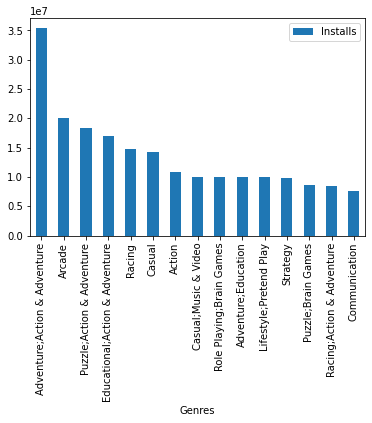

In [ ]:
installs=data.groupby('Genres')['Installs'].mean().reset_index().rename(columns={'Genres':'Genres','index':'Installs'})
#avg_genre_rating.sort_values('Rating', ascending=False).head(10)
installs = installs.sort_values(by=['Installs'], ascending=False)
top_installs=installs.head(15)
print(top_installs)
top_installs.plot(x="Genres", y=["Installs"], kind="bar")

**Top 15 App Genres which have received the most reviews**

                             Genres       Reviews
3      Adventure;Action & Adventure  1.513269e+06
101                        Strategy  1.166471e+06
26                           Casual  6.508789e+05
6                            Arcade  5.956669e+05
85                           Racing  5.875986e+05
81        Puzzle;Action & Adventure  5.338953e+05
24          Card;Action & Adventure  5.250870e+05
0                            Action  4.617346e+05
5               Adventure;Education  2.886060e+05
45   Educational;Action & Adventure  2.258023e+05
2                         Adventure  2.131140e+05
53         Entertainment;Creativity  2.108800e+05
88                     Role Playing  2.039784e+05
86        Racing;Action & Adventure  1.990641e+05
35                    Communication  1.908700e+05


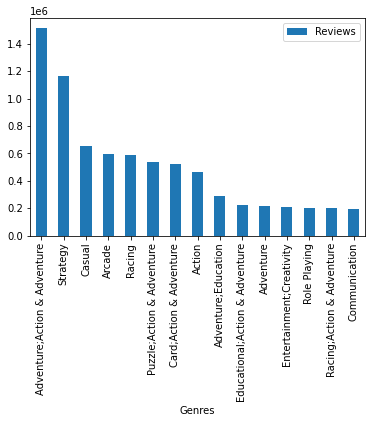

In [74]:
reviews=data.groupby('Genres')['Reviews'].mean().reset_index().rename(columns={'Genres':'Genres','index':'Reviews'})
reviews = reviews.sort_values(by=['Reviews'], ascending=False)
top_reviewed=reviews.head(15)
print(top_reviewed)
top_reviewed.plot(x="Genres", y=["Reviews"], kind="bar")

**TOP 15 App Genres based on the Average App Size**

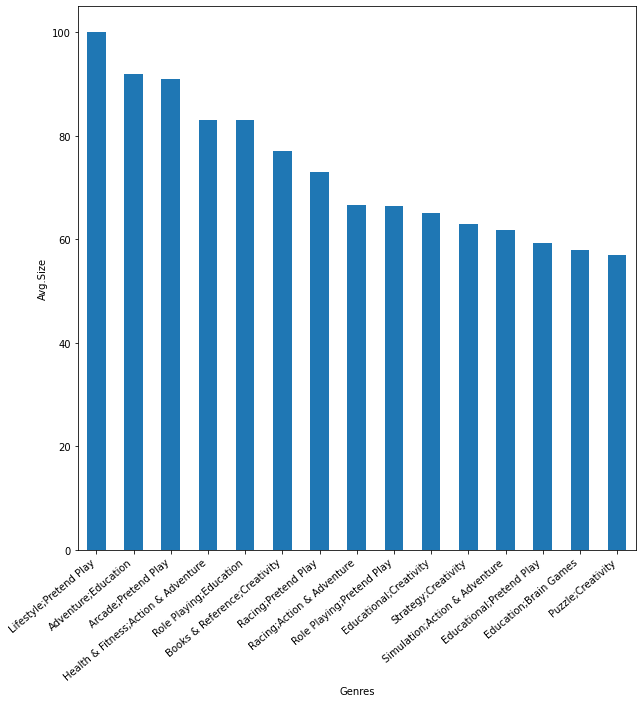

In [90]:
size=data.groupby('Genres')["Size"].mean().sort_values(ascending=False)
top_size=size.head(15).plot(kind='bar',figsize=(10,10))
plt.ylabel('Avg.Size')
top_size.set_xticklabels(top_size.get_xticklabels(), rotation=40, ha="right")
plt.show()

**Free and Paid App install comparison**

In [98]:
categoty_type_installs = data.groupby(['Genres','Type'])[['Installs']].sum().reset_index().head(40)
categoty_type_installs['log_Installs'] = np.log2(categoty_type_installs['Installs'])

categoty_type_installs

,Genres,Type,Installs,log_Installs
0,Action,Free,2956486790,31.461237
1,Action,Paid,17052250,24.023459
2,Action;Action & Adventure,Free,43000000,25.357833
3,Action;Action & Adventure,Paid,20500,14.323336
4,Adventure,Free,215417110,27.682558
5,Adventure,Paid,1278200,20.285682
6,Adventure;Action & Adventure,Free,106000000,26.659489
7,Adventure;Brain Games,Paid,100000,16.609640
8,Adventure;Education,Free,10000000,23.253497
9,Arcade,Free,3281641890,31.611771


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


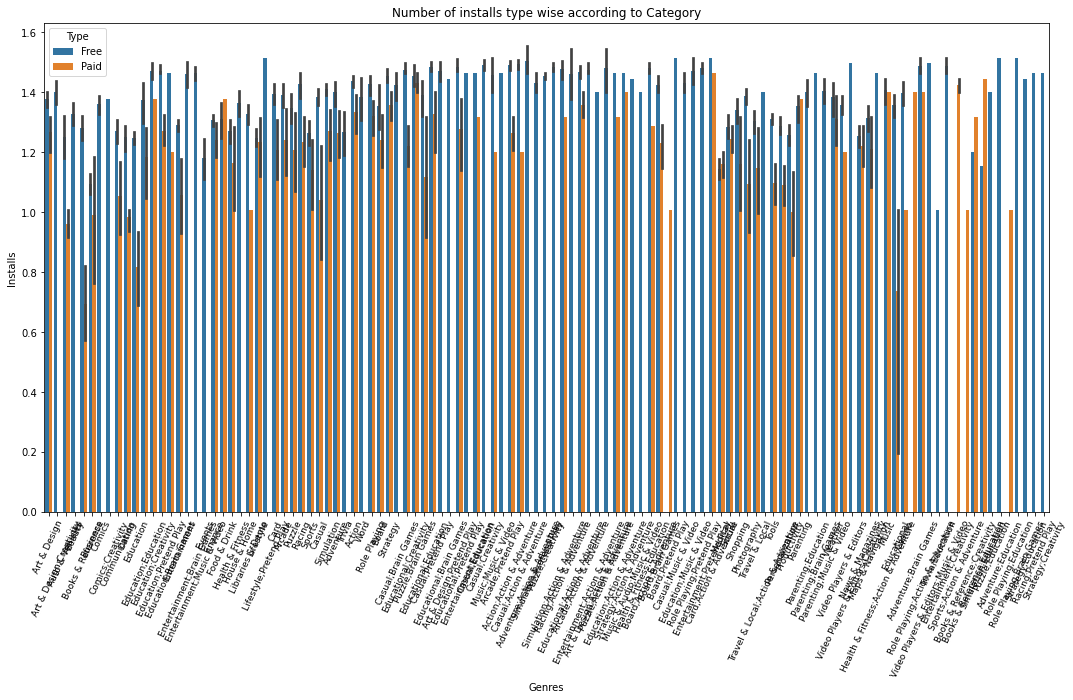

In [107]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Number of installs type wise according to Category")
sns.barplot('Genres', 'Installs', hue='Type', data=data);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


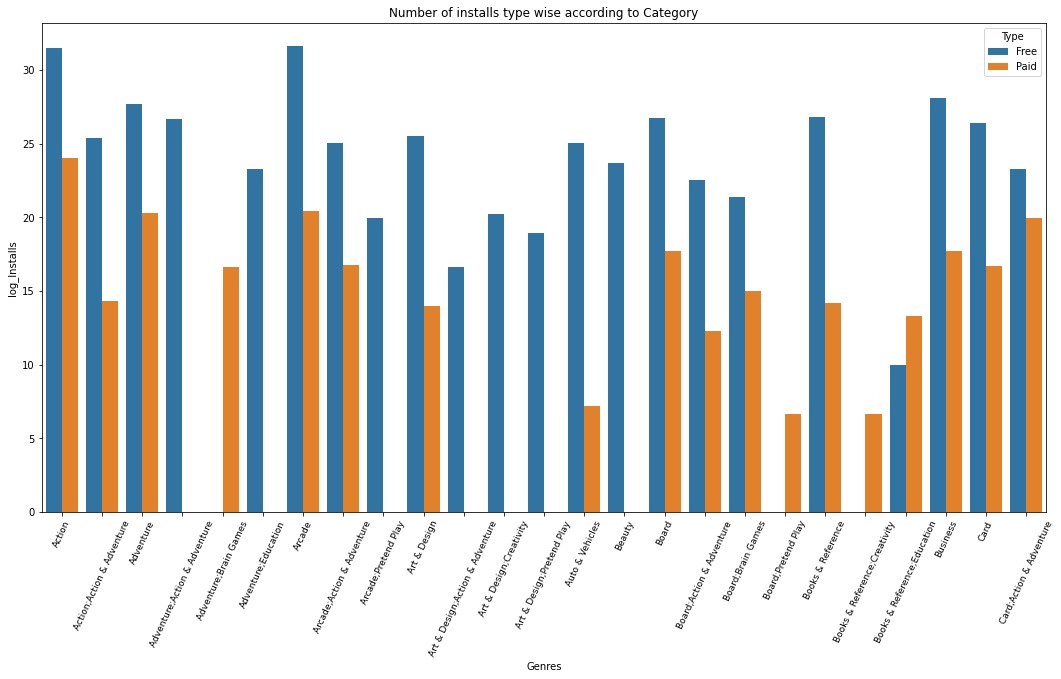

In [99]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Number of installs type wise according to Category")
sns.barplot('Genres', 'log_Installs', hue='Type', data=categoty_type_installs);
plt.show()

**Effect of App size on Installs**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


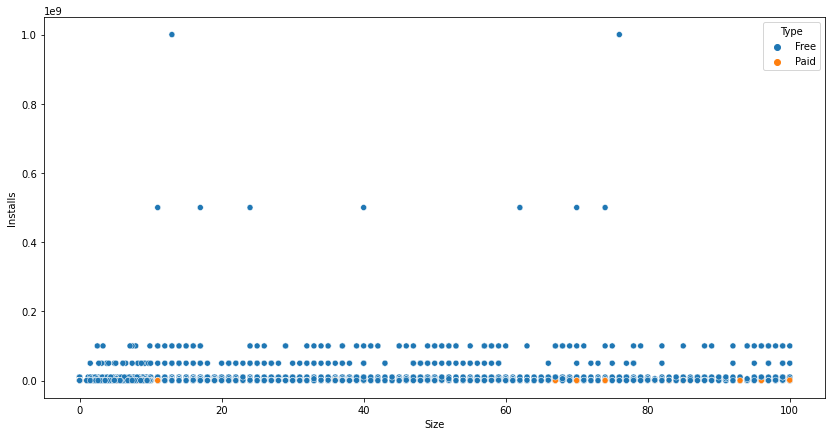

In [102]:
plt.figure(figsize=(14,7))
sns.scatterplot(data['Size'], data['Installs'], hue=data['Type'])
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


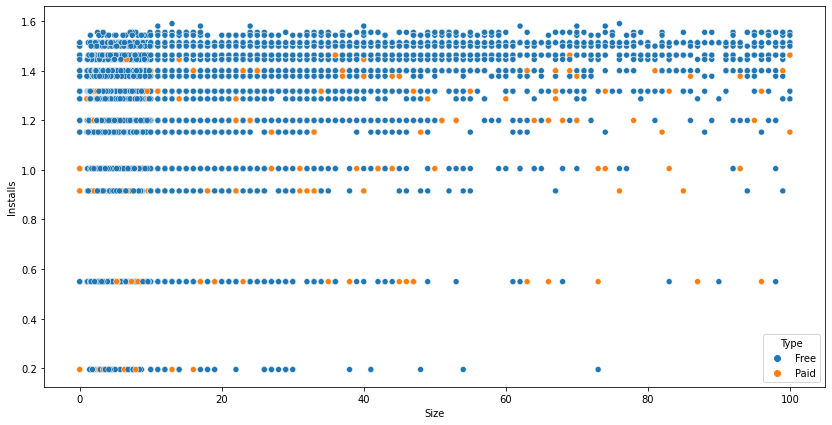

In [106]:
data['Installs'] = np.log(data['Installs'])
plt.figure(figsize=(14,7))
sns.scatterplot(data['Size'], data['Installs'], hue=data['Type'])
plt.show()